# **weatherAUS**

In [ ]:
#extraer dataset

!pip install -U -q PyDrive


import pandas as pd
import numpy as np
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Graficación

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats
from termcolor import colored

#librerias para visualización grafica en mapa
!pip install geopandas
!python -m pip install basemap
!pip install contextily
import geopandas as gpd
import matplotlib.colors as mplc
import matplotlib.ticker as ticker
from mpl_toolkits.basemap import Basemap
import contextily as ctx # for basemaps

#imputación de variables
!pip install missingpy
!pip install -U scikit-learn
!pip install -U imbalanced-learn
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.impute import KNNImputer
from numpy import isnan
from sklearn.preprocessing import MinMaxScaler

#Codificacion de variables
from sklearn import preprocessing
from random import randrange
from collections import defaultdict
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline


#Balance de clases
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


#Modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score,plot_confusion_matrix,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 16.7 MB 42.5 MB/s 
     |████████████████████████████████| 6.3 MB 42.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 864 kB 5.1 MB/s 
     |████████████████████████████████| 30.5 MB 1.3 MB/s 
     |████████████████████████████████| 46 kB 2.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.6 MB/s 
     |████████████████████████████████| 19.3 MB 7.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, h

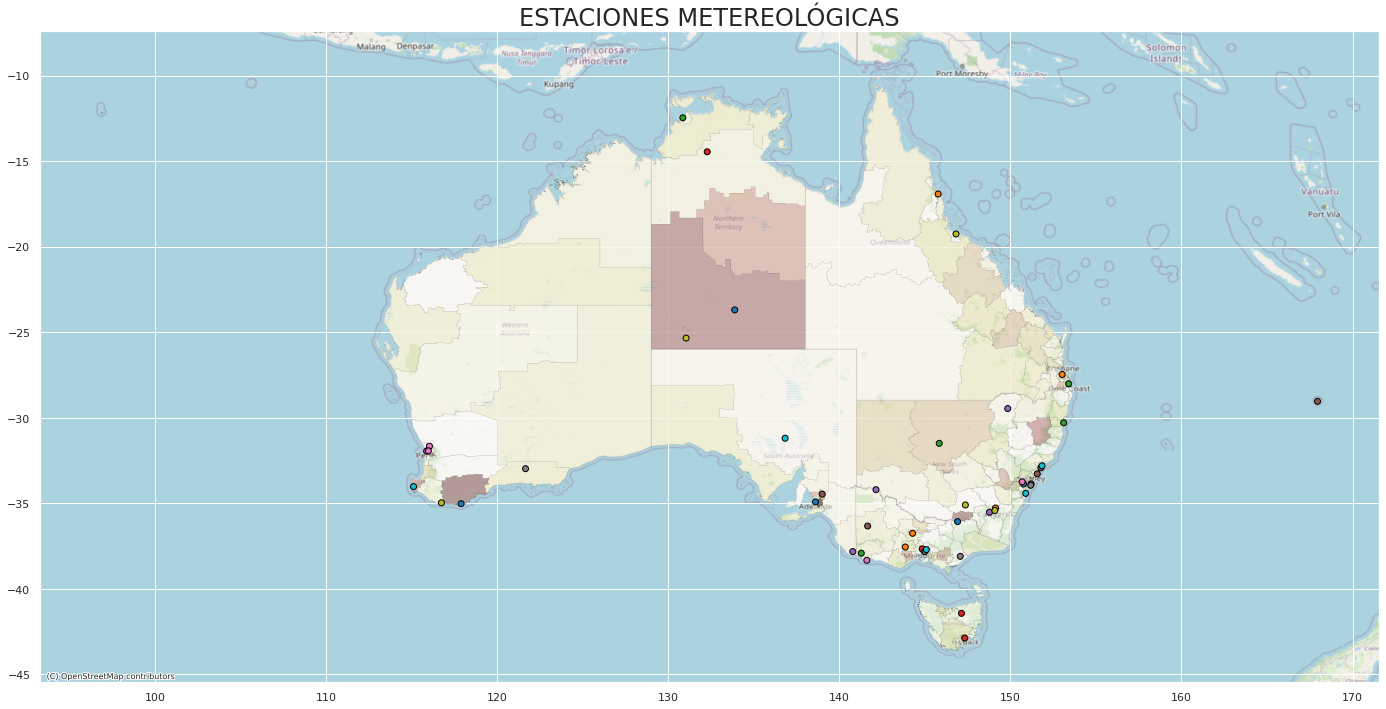

In [ ]:
#Shape para visualizar los datos graficamente
shapefile = gpd.read_file("Australia_.shp")
shapefile_mete = gpd.read_file("Estaciones_metereologicas.shp")

#creando visualizacion de datos
fig , ax = plt.subplots(1 ,figsize = (24,12))

shapefile.plot(
  column = 'SA3_NAME_2',
  legend = False,
  cmap ='pink',
  ax = ax,
  norm = mplc.LogNorm(), #utilizando el logaritmo de la variable
  linewidth = 0.1, #ajustando el grosor de las lineas del mapa
  edgecolor ='black',
  alpha=0.5
  )
shapefile_mete.plot(
  column = 'Name',
  legend = False,
  ax = ax,
  #norm = mplc.LogNorm(), #utilizando el logaritmo de la variable
  linewidth = 1, #ajustando el grosor de las lineas del mapa
  edgecolor ='black'
  )
ctx.add_basemap(ax, crs = shapefile_mete.crs, source=ctx.providers.OpenStreetMap.Mapnik)
#formateando los números a absultos de lo contrario salieran a base 10
formatter = ticker.LogFormatter(10, labelOnlyBase=True)
ax.set_title('ESTACIONES METEREOLÓGICAS', fontsize = 24)
plt.grid
plt.show()

In [ ]:
link = 'https://drive.google.com/file/d/1f9vCSy9uEdn_tiOyCWI58lLCaEp4l50M/view?usp=sharing'


id = link.split("/")[-2]
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('weatherAUS.csv')

Data = pd.read_csv('weatherAUS.csv')
print('Tamaño del dataset :', Data.shape)

Tamaño del dataset : (145460, 23)


In [ ]:
#Tipo de variable Fecha/Hora, se implementa la corrección de cardinalidad (año, mes, día) con la finalidad de poder analizar las variables por separado
Data['Date'] = pd.to_datetime(Data['Date'])


Data['year'] = Data['Date'].dt.year
Data['month'] = Data['Date'].dt.month
Data['day'] = Data['Date'].dt.day
Data['dia_año'] = Data['day'] + ((Data['month']-1)*30)
Data.drop('Date', axis = 1, inplace = True)

In [ ]:
import copy
#filtrar por las localizaciones seleccionadas.
Data_Location = Data[(Data.Location=='SydneyAirport') |(Data.Location=='MelbourneAirport')| (Data.Location=='Darwin')| (Data.Location=='Perth')]


In [ ]:
#Generar subdataset de análisis
Data_SydneyAirport = Data_Location[(Data.Location=='SydneyAirport')]
Data_MelbourneAirport = Data_Location[(Data.Location=='MelbourneAirport')]
Data_Darwin = Data_Location[(Data.Location=='Darwin')]
Data_Perth = Data_Location[(Data.Location=='Perth')]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


##**Missing value**

In [ ]:
#Missing value
Darwin = Data_Darwin.isnull().sum()
SydneyAirport = Data_SydneyAirport.isnull().sum()
MelbourneAirport = Data_MelbourneAirport.isnull().sum()
Perth = Data_Perth.isnull().sum()
Data_nulos = pd.DataFrame({'Darwin':Darwin,
                   'Melbourne Airport':MelbourneAirport,
                   'Sydney Airport':SydneyAirport,
                   'Perth':Perth})
Data_nulos.style.highlight_max(color = 'coral', axis = 0)

,Darwin,Melbourne Airport,Sydney Airport,Perth
Location,0,0,0,0
MinTemp,1,0,1,0
MaxTemp,1,0,0,1
Rainfall,0,0,4,0
Evaporation,54,3,46,1
Sunshine,4,1,16,5
WindGustDir,46,15,51,5
WindGustSpeed,42,15,51,5
WindDir9am,28,40,8,134
WindDir3pm,3,13,4,7


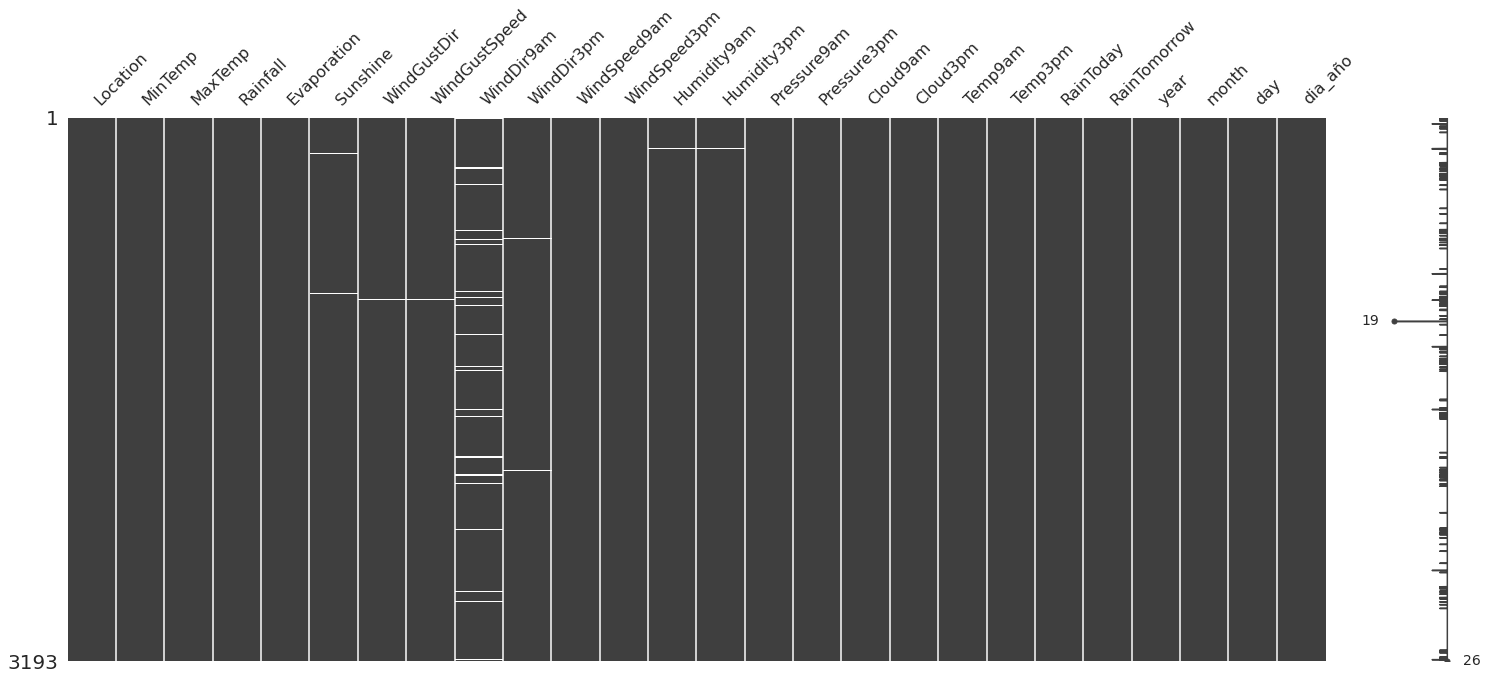

In [ ]:
msno.matrix(Data_Perth)

In [ ]:
#Missing value
Darwin = Data_Darwin.isnull().sum()/Data_Darwin.shape[0]*100
SydneyAirport = Data_SydneyAirport.isnull().sum()/Data_SydneyAirport.shape[0]*100
MelbourneAirport = Data_MelbourneAirport.isnull().sum()/Data_MelbourneAirport.shape[0]*100
Perth = Data_Perth.isnull().sum()/Data_Perth.shape[0]*100
Data_nulos = pd.DataFrame({'Darwin':Darwin,
                   'Melbourne Airport':MelbourneAirport,
                   'Sydney Airport':SydneyAirport,
                   'Perth':Perth})
Data_nulos.style.highlight_max(color = 'coral', axis = 0)

,Darwin,Melbourne Airport,Sydney Airport,Perth
Location,0.000000,0.000000,0.000000,0.000000
MinTemp,0.031319,0.000000,0.033234,0.000000
MaxTemp,0.031319,0.000000,0.000000,0.031319
Rainfall,0.000000,0.000000,0.132935,0.000000
Evaporation,1.691199,0.099701,1.528747,0.031319
Sunshine,0.125274,0.033234,0.531738,0.156593
WindGustDir,1.440651,0.498504,1.694915,0.156593
WindGustSpeed,1.315377,0.498504,1.694915,0.156593
WindDir9am,0.876918,1.329345,0.265869,4.196680
WindDir3pm,0.093956,0.432037,0.132935,0.219230


In [ ]:
#Anulación de missing value
print(colored('\033[1m' +'Dataset: SydneyAirport'+ '\033[0m', 'red', attrs=['bold']))
DataSydney_missing = Data_SydneyAirport.dropna()
print('nro de filas originales dataset Sydney:',Data_SydneyAirport.shape[0])
print('nro de filas dataset Sydney con nulos:', Data_SydneyAirport.shape[0] - DataSydney_missing .isnull().shape[0])
print('% de pérdida de dataset Sydney:',(( Data_SydneyAirport.shape[0] - DataSydney_missing .isnull().shape[0])/Data_SydneyAirport.shape[0])*100)
print(colored('\033[1m' +'Dataset: Perth'+ '\033[0m', 'red', attrs=['bold']))
DataPerth_missing = Data_Perth.dropna()
print('nro de filas originales dataset Perth:',Data_Perth.shape[0])
print('nro de filas dataset Perth con nulos:', Data_Perth.shape[0] - DataPerth_missing .isnull().shape[0])
print('% de pérdida de dataset Perth:',(( Data_Perth.shape[0] - DataPerth_missing .isnull().shape[0])/Data_Perth.shape[0])*100)
print(colored('\033[1m' +'Dataset: MelbourneAirport'+ '\033[0m', 'red', attrs=['bold']))
DataMelbourneAirport_missing = Data_MelbourneAirport.dropna()
print('nro de filas originales dataset MelbourneAirport:',Data_MelbourneAirport.shape[0])
print('nro de filas dataset MelbourneAirport con nulos:', Data_MelbourneAirport.shape[0] - DataMelbourneAirport_missing .isnull().shape[0])
print('% de pérdida de dataset MelbourneAirport:',(( Data_MelbourneAirport.shape[0] - DataMelbourneAirport_missing .isnull().shape[0])/Data_MelbourneAirport.shape[0])*100)
print(colored('\033[1m' +'Dataset: Darwin'+ '\033[0m', 'red', attrs=['bold']))
DataDarwin_missing = Data_Darwin.dropna()
print('nro de filas originales dataset Darwin:',Data_Darwin.shape[0])
print('nro de filas dataset Darwin con nulos:', Data_Darwin.shape[0] - DataDarwin_missing .isnull().shape[0])
print('% de pérdida de dataset Darwin:',(( Data_Darwin.shape[0] - DataDarwin_missing .isnull().shape[0])/Data_Darwin.shape[0])*100)


Dataset: SydneyAirport
nro de filas originales dataset Sydney: 3009
nro de filas dataset Sydney con nulos: 139
% de pérdida de dataset Sydney: 4.61947490860751
Dataset: Perth
nro de filas originales dataset Perth: 3193
nro de filas dataset Perth con nulos: 168
% de pérdida de dataset Perth: 5.261509552145318
Dataset: MelbourneAirport
nro de filas originales dataset MelbourneAirport: 3009
nro de filas dataset MelbourneAirport con nulos: 80
% de pérdida de dataset MelbourneAirport: 2.6586905948820205
Dataset: Darwin
nro de filas originales dataset Darwin: 3193
nro de filas dataset Darwin con nulos: 131
% de pérdida de dataset Darwin: 4.102724710303789


##**Tratamiento de Outlier**

In [ ]:
#tratamiento de outliers.
def outlier_diagnostic_plots(df, variable):
    fig,axes = plt.subplots(1,3,figsize=(20,4))

    sns.histplot(df[variable], bins=30,ax=axes[0], kde=True)
    axes[0].set_title('Histograma')

    stats.probplot(df[variable], dist="norm", plot=axes[1])
    axes[1].set_title('QQ')

    # boxplot
    sns.boxplot(y=df[variable],ax=axes[2])
    axes[2].set_title('Box&Whiskers')

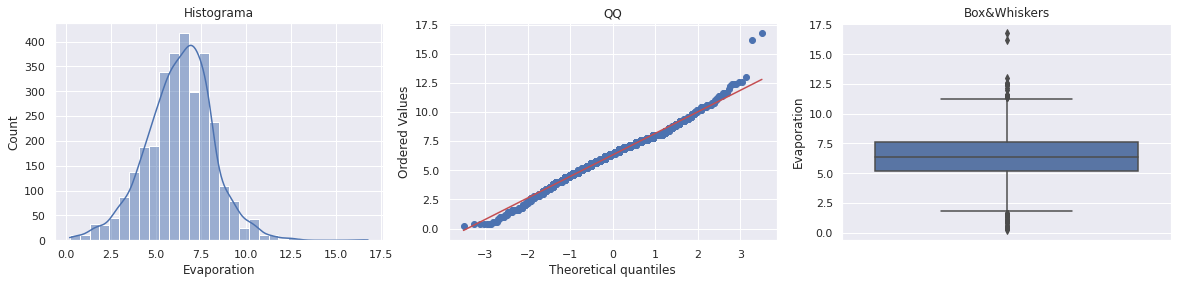

In [ ]:
outlier_diagnostic_plots(DataDarwin_missing, 'Evaporation')

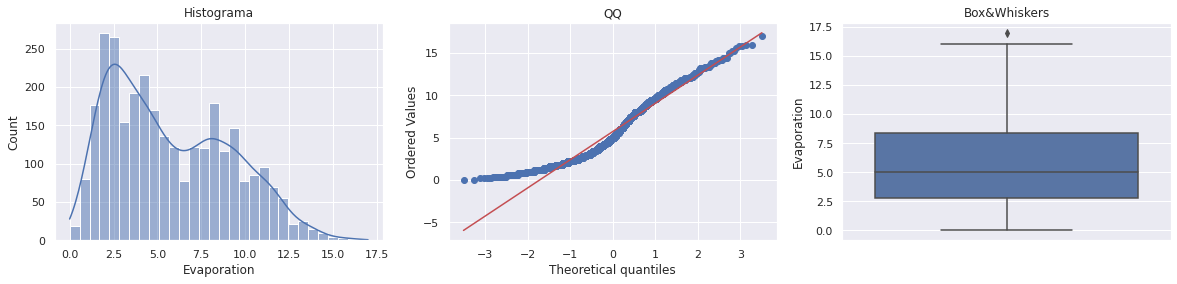

In [ ]:
outlier_diagnostic_plots(DataPerth_missing, 'Evaporation')

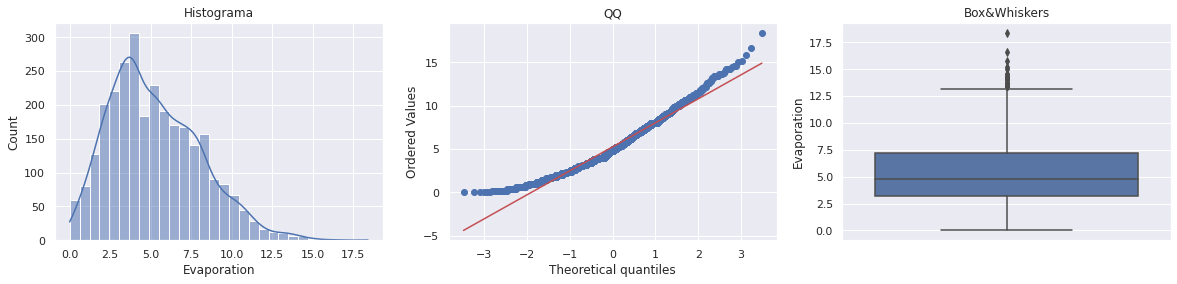

In [ ]:
outlier_diagnostic_plots(DataSydney_missing, 'Evaporation')

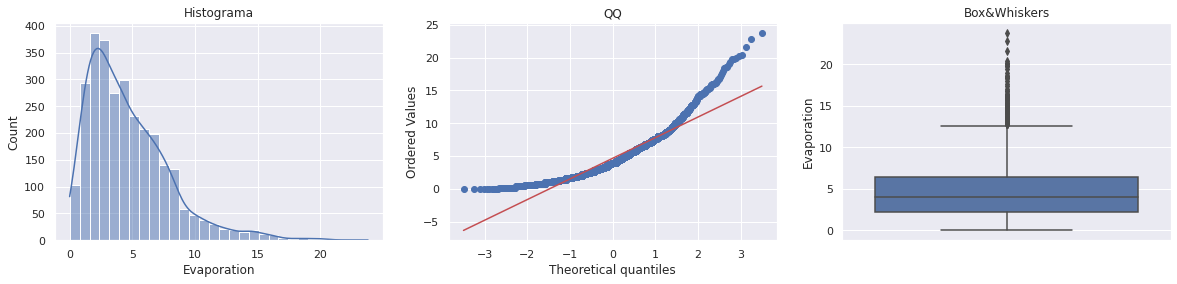

In [ ]:
outlier_diagnostic_plots(DataMelbourneAirport_missing, 'Evaporation')

In [ ]:
##Tratamiento de outliers por distancia IQR
#Las distribuciones tienen oblicuidad, utilizamos el método de distancia IQR para obtener los umbrales para cada variable.
features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm']
for feature in features_with_outliers:
    q1 = DataDarwin_missing[feature].quantile(0.25)
    q3 = DataDarwin_missing[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    DataDarwin_missing.loc[DataDarwin_missing[feature]<lower_limit,feature] = lower_limit
    DataDarwin_missing.loc[DataDarwin_missing[feature]>upper_limit,feature] = upper_limit


for feature in features_with_outliers:
    q1 = DataPerth_missing[feature].quantile(0.25)
    q3 = DataPerth_missing[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    DataPerth_missing.loc[DataPerth_missing[feature]<lower_limit,feature] = lower_limit
    DataPerth_missing.loc[DataPerth_missing[feature]>upper_limit,feature] = upper_limit

for feature in features_with_outliers:
    q1 = DataSydney_missing[feature].quantile(0.25)
    q3 = DataSydney_missing[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    DataSydney_missing.loc[DataSydney_missing[feature]<lower_limit,feature] = lower_limit
    DataSydney_missing.loc[DataSydney_missing[feature]>upper_limit,feature] = upper_limit

for feature in features_with_outliers:
    q1 = DataMelbourneAirport_missing[feature].quantile(0.25)
    q3 = DataMelbourneAirport_missing[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    DataMelbourneAirport_missing.loc[DataMelbourneAirport_missing[feature]<lower_limit,feature] = lower_limit
    DataMelbourneAirport_missing.loc[DataMelbourneAirport_missing[feature]>upper_limit,feature] = upper_limit

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


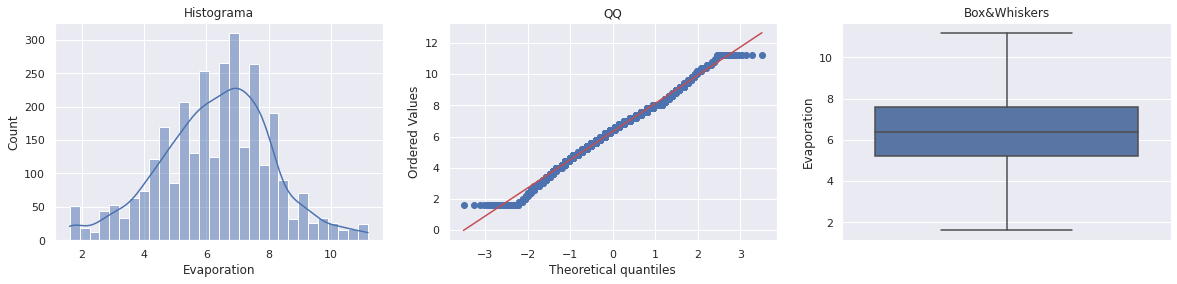

In [ ]:
outlier_diagnostic_plots(DataDarwin_missing, 'Evaporation')

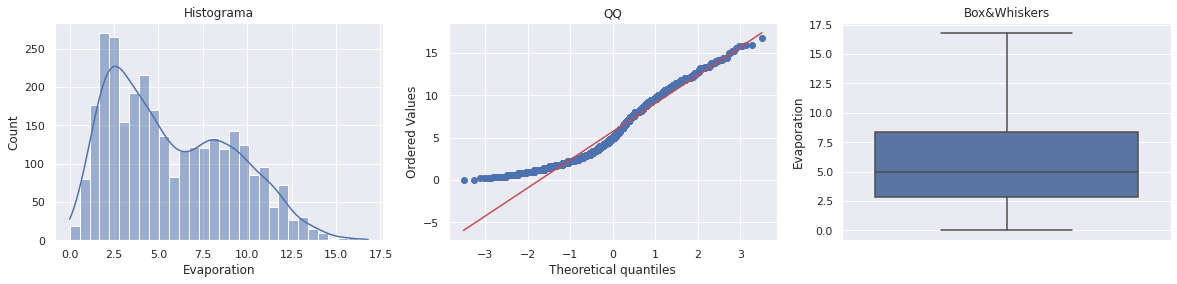

In [ ]:
outlier_diagnostic_plots(DataPerth_missing, 'Evaporation')

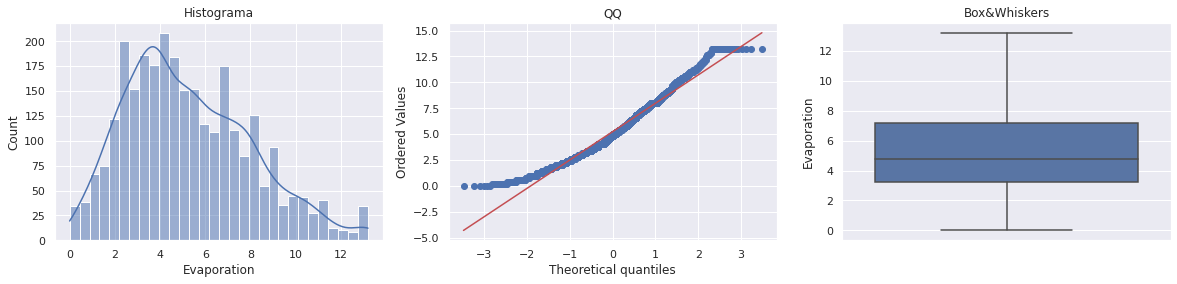

In [ ]:
outlier_diagnostic_plots(DataSydney_missing, 'Evaporation')

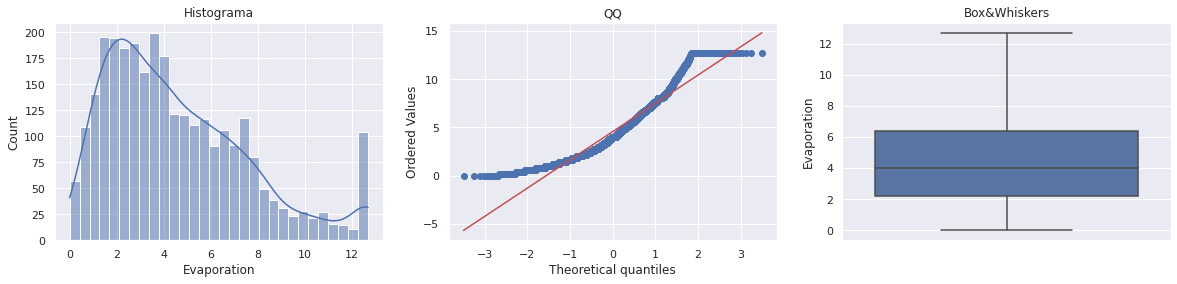

In [ ]:
outlier_diagnostic_plots(DataMelbourneAirport_missing, 'Evaporation')

##**Codificación de variables categoricas**

In [ ]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [ ]:
DataDarwin_missing = MultiColumnLabelEncoder (columns = DataDarwin_missing[[ 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']]).fit_transform(DataDarwin_missing)
DataPerth_missing = MultiColumnLabelEncoder (columns = DataPerth_missing[[ 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']]).fit_transform(DataPerth_missing)
DataSydney_missing = MultiColumnLabelEncoder (columns = DataSydney_missing[[ 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']]).fit_transform(DataSydney_missing)
DataMelbourneAirport_missing = MultiColumnLabelEncoder (columns = DataMelbourneAirport_missing[[ 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']]).fit_transform(DataMelbourneAirport_missing)
DataDarwin_missing

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day,dia_año
139111,Darwin,20.0000,33.1,0.0,4.4,11.0,0,41.0,1,10,...,1.0,2.0,25.4,32.3,0,0,2008,7,1,181
139112,Darwin,19.4000,32.4,0.0,6.0,10.4,1,50.0,9,0,...,1.0,1.0,24.3,31.9,0,0,2008,7,2,182
139113,Darwin,18.2000,31.8,0.0,8.0,11.0,0,46.0,2,1,...,0.0,1.0,24.3,31.2,0,0,2008,7,3,183
139114,Darwin,17.3000,30.7,0.0,7.0,10.4,0,44.0,9,0,...,2.0,6.0,21.3,29.8,0,0,2008,7,4,184
139115,Darwin,15.8375,30.8,0.0,7.0,10.8,2,46.0,0,0,...,1.0,1.0,22.2,29.6,0,0,2008,7,5,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,Darwin,19.3000,33.4,0.0,6.0,11.0,1,35.0,9,4,...,0.0,1.0,24.5,32.3,0,0,2017,6,20,170
142299,Darwin,21.2000,32.6,0.0,7.6,8.6,0,37.0,9,9,...,7.0,0.0,24.8,32.0,0,0,2017,6,21,171
142300,Darwin,20.7000,32.8,0.0,5.6,11.0,0,33.0,0,13,...,0.0,0.0,24.8,32.1,0,0,2017,6,22,172
142301,Darwin,19.5000,31.8,0.0,6.2,10.6,2,26.0,9,6,...,1.0,1.0,24.8,29.2,0,0,2017,6,23,173


##**Desbalance de clases**

In [ ]:
y_Darwin = DataDarwin_missing['RainTomorrow']
x_Darwin = DataDarwin_missing[[ 'MinTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm', 'RainToday','dia_año']]

y_Perth = DataPerth_missing['RainTomorrow']
x_Perth = DataPerth_missing[[ 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm', 'RainToday','dia_año']]

y_SydneyAirpor = DataSydney_missing['RainTomorrow']
x_SydneyAirpor = DataSydney_missing[[ 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm', 'RainToday','dia_año']]

y_MelbourneAirport = DataMelbourneAirport_missing['RainTomorrow']
x_MelbourneAirport = DataMelbourneAirport_missing[[ 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm', 'RainToday','dia_año']]

In [ ]:
x_train_Darwin, x_test_Darwin, y_train_Darwin, y_test_Darwin = train_test_split(x_Darwin,y_Darwin,test_size=0.3,random_state = 42)
x_train_Perth, x_test_Perth, y_train_Perth, y_test_Perth = train_test_split(x_Perth,y_Perth,test_size=0.3,random_state = 42)
x_train_SydneyAirpor, x_test_SydneyAirpor, y_train_SydneyAirpor, y_test_SydneyAirpor = train_test_split(x_SydneyAirpor,y_SydneyAirpor,test_size=0.3,random_state = 42)
x_train_MelbourneAirport, x_test_MelbourneAirport, y_train_MelbourneAirport, y_test_MelbourneAirport = train_test_split(x_MelbourneAirport,y_MelbourneAirport,test_size=0.3,random_state = 42)

In [ ]:
#Oversampler
print(colored('\033[1m' +'Darwin'+ '\033[0m', 'red', attrs=['bold']))
oversampler = RandomOverSampler(sampling_strategy='minority');

x_train_Darwin_os,y_train_Darwin_os = oversampler.fit_resample(x_train_Darwin,y_train_Darwin);

print('Composición del training set para Darwin:')
print(y_train_Darwin_os.value_counts())

print('\nComposición del test set para Darwin:')
print(y_test_Darwin.value_counts())

print(colored('\033[1m' +'Perth'+ '\033[0m', 'red', attrs=['bold']))

x_train_Perth_os,y_train_Perth_os = oversampler.fit_resample(x_train_Perth,y_train_Perth);

print('Composición del training set para Perth:')
print(y_train_Perth_os.value_counts())

print('\nComposición del test set para Perth:')
print(y_test_Perth.value_counts())

print(colored('\033[1m' +'SydneyAirpor'+ '\033[0m', 'red', attrs=['bold']))
x_train_SydneyAirpor_os,y_train_SydneyAirpor_os = oversampler.fit_resample(x_train_SydneyAirpor,y_train_SydneyAirpor);

print('Composición del training set para SydneyAirpor:')
print(y_train_SydneyAirpor_os.value_counts())

print('\nComposición del test set para SydneyAirpor:')
print(y_test_SydneyAirpor.value_counts())

print(colored('\033[1m' +'MelbourneAirport'+ '\033[0m', 'red', attrs=['bold']))
x_train_MelbourneAirport_os,y_train_MelbourneAirport_os = oversampler.fit_resample(x_train_MelbourneAirport,y_train_MelbourneAirport);

print('Composición del training set para SydneyAirpor:')
print(y_train_MelbourneAirport_os.value_counts())

print('\nComposición del test set para SydneyAirpor:')
print(y_test_MelbourneAirport.value_counts())

Darwin
Composición del training set para Darwin:
1    1588
0    1588
Name: RainTomorrow, dtype: int64

Composición del test set para Darwin:
0    685
1    234
Name: RainTomorrow, dtype: int64
Perth
Composición del training set para Perth:
0    1687
1    1687
Name: RainTomorrow, dtype: int64

Composición del test set para Perth:
0    722
1    186
Name: RainTomorrow, dtype: int64
SydneyAirpor
Composición del training set para SydneyAirpor:
0    1507
1    1507
Name: RainTomorrow, dtype: int64

Composición del test set para SydneyAirpor:
0    648
1    213
Name: RainTomorrow, dtype: int64
MelbourneAirport
Composición del training set para SydneyAirpor:
0    1605
1    1605
Name: RainTomorrow, dtype: int64

Composición del test set para SydneyAirpor:
0    688
1    191
Name: RainTomorrow, dtype: int64


##**Normalización**

In [ ]:
sc = MinMaxScaler()

x_train_Darwin_os = sc.fit_transform(x_train_Darwin_os)
x_test_Darwin = sc.transform(x_test_Darwin)

x_train_Perth_os = sc.fit_transform(x_train_Perth_os)
x_test_Perth = sc.transform(x_test_Perth)

x_train_SydneyAirpor_os = sc.fit_transform(x_train_SydneyAirpor_os)
x_test_SydneyAirpor= sc.transform(x_test_SydneyAirpor)

x_train_MelbourneAirport_os = sc.fit_transform(x_train_MelbourneAirport_os)
x_test_MelbourneAirport= sc.transform(x_test_MelbourneAirport)

In [ ]:
x_train_Darwin_os.shape

(3176, 15)

##**Modelos**

### **Random Forest**

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
rf_model.fit(x_train_SydneyAirpor_os, y_train_SydneyAirpor_os.values.ravel())
pred_rf = rf_model.predict(x_test_SydneyAirpor)
print(classification_report(y_test_SydneyAirpor,pred_rf))
print(rf_model.score(x_test_SydneyAirpor, y_test_SydneyAirpor))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       648
           1       0.66      0.56      0.61       213

    accuracy                           0.82       861
   macro avg       0.76      0.73      0.75       861
weighted avg       0.81      0.82      0.82       861

0.8199767711962834


In [ ]:
rf_model.fit(x_train_Darwin_os, y_train_Darwin_os.values.ravel())
pred_rf = rf_model.predict(x_test_Darwin)
print(classification_report(y_test_Darwin,pred_rf))
print(rf_model.score(x_test_Darwin, y_test_Darwin))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       685
           1       0.67      0.74      0.70       234

    accuracy                           0.84       919
   macro avg       0.79      0.81      0.80       919
weighted avg       0.85      0.84      0.84       919

0.8400435255712732


In [ ]:
rf_model.fit(x_train_Perth_os, y_train_Perth_os.values.ravel())
pred_rf = rf_model.predict(x_test_Perth)
print(classification_report(y_test_Perth,pred_rf))
print(rf_model.score(x_test_Perth, y_test_Perth))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       722
           1       0.76      0.72      0.74       186

    accuracy                           0.90       908
   macro avg       0.84      0.83      0.84       908
weighted avg       0.89      0.90      0.89       908

0.8953744493392071


In [ ]:
rf_model.fit(x_train_MelbourneAirport_os, y_train_MelbourneAirport_os.values.ravel())
pred_rf = rf_model.predict(x_test_MelbourneAirport)
print(classification_report(y_test_MelbourneAirport,pred_rf))
print(rf_model.score(x_test_MelbourneAirport, y_test_MelbourneAirport))


              precision    recall  f1-score   support

           0       0.86      0.90      0.88       688
           1       0.57      0.48      0.52       191

    accuracy                           0.81       879
   macro avg       0.71      0.69      0.70       879
weighted avg       0.80      0.81      0.80       879

0.8065984072810012


### **Regresion Lineal**

In [ ]:
lr_model = LogisticRegression()

In [ ]:
lr_model.fit(x_train_Darwin_os, y_train_Darwin_os)
pred_lr = lr_model.predict(x_test_Darwin)
print(classification_report(y_test_Darwin,pred_lr))
print(lr_model.score(x_test_Darwin, y_test_Darwin))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       685
           1       0.59      0.88      0.70       234

    accuracy                           0.81       919
   macro avg       0.77      0.83      0.78       919
weighted avg       0.86      0.81      0.82       919

0.8117519042437432


In [ ]:
lr_model.fit(x_train_Perth_os, y_train_Perth_os)
pred_lr = lr_model.predict(x_test_Perth)
print(classification_report(y_test_Perth,pred_lr))
print(lr_model.score(x_test_Perth, y_test_Perth))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       722
           1       0.62      0.86      0.72       186

    accuracy                           0.86       908
   macro avg       0.79      0.86      0.81       908
weighted avg       0.89      0.86      0.87       908

0.8612334801762115


In [ ]:
lr_model.fit(x_train_SydneyAirpor_os, y_train_SydneyAirpor_os)
pred_lr = lr_model.predict(x_test_SydneyAirpor)
print(classification_report(y_test_SydneyAirpor,pred_lr))
print(lr_model.score(x_test_SydneyAirpor, y_test_SydneyAirpor))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82       648
           1       0.50      0.74      0.60       213

    accuracy                           0.75       861
   macro avg       0.70      0.75      0.71       861
weighted avg       0.80      0.75      0.77       861

0.7549361207897793


In [ ]:
lr_model.fit(x_train_MelbourneAirport_os, y_train_MelbourneAirport_os)
pred_lr = lr_model.predict(x_test_MelbourneAirport)
print(classification_report(y_test_MelbourneAirport,pred_lr))
print(lr_model.score(x_test_MelbourneAirport, y_test_MelbourneAirport))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82       688
           1       0.45      0.76      0.57       191

    accuracy                           0.75       879
   macro avg       0.68      0.75      0.69       879
weighted avg       0.82      0.75      0.76       879

0.745164960182025


### **LDA**

In [ ]:
lda = LDA(n_components=1)
lda.fit(x_train_MelbourneAirport_os, y_train_MelbourneAirport_os)
pred_LDA = lda.predict(x_test_MelbourneAirport)

print(classification_report(y_test_MelbourneAirport,pred_LDA))
print(lda.score(x_test_MelbourneAirport, y_test_MelbourneAirport))

              precision    recall  f1-score   support

           0       0.92      0.76      0.83       688
           1       0.47      0.76      0.58       191

    accuracy                           0.76       879
   macro avg       0.69      0.76      0.71       879
weighted avg       0.82      0.76      0.78       879

0.7599544937428896


In [ ]:
lda = LDA(n_components=1)
lda.fit(x_train_Darwin_os, y_train_Darwin_os)
pred_LDA = lda.predict(x_test_Darwin)

print(classification_report(y_test_Darwin,pred_LDA))
print(lda.score(x_test_Darwin, y_test_Darwin))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       685
           1       0.59      0.88      0.71       234

    accuracy                           0.81       919
   macro avg       0.77      0.84      0.79       919
weighted avg       0.86      0.81      0.82       919

0.8139281828073993


In [ ]:
lda = LDA(n_components=1)
lda.fit(x_train_SydneyAirpor_os, y_train_SydneyAirpor_os)
pred_LDA = lda.predict(x_test_SydneyAirpor)

print(classification_report(y_test_SydneyAirpor,pred_LDA))
print(lda.score(x_test_SydneyAirpor, y_test_SydneyAirpor))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84       648
           1       0.53      0.74      0.62       213

    accuracy                           0.77       861
   macro avg       0.72      0.76      0.73       861
weighted avg       0.81      0.77      0.78       861

0.7735191637630662


In [ ]:
lda = LDA(n_components=1)
lda.fit(x_train_Perth_os, y_train_Perth_os)
pred_LDA = lda.predict(x_test_Perth)

print(classification_report(y_test_Perth,pred_LDA))
print(lda.score(x_test_Perth, y_test_Perth))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       722
           1       0.63      0.84      0.72       186

    accuracy                           0.87       908
   macro avg       0.79      0.86      0.82       908
weighted avg       0.89      0.87      0.87       908

0.8678414096916299
